In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../")
from collections import Counter

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid
import torchvision.transforms.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

from hcl.dataset import FashionMNISTDataModule, FashionMNISTPair
from hcl.model import Finetuner

In [2]:
DATA_FOLDER = './data'
CLASSIFIER_PATH = None

In [3]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
        
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(12, 12))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

/home/giacomo/PycharmProjects/ntropy-ml-engineer/venv_ntropy/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

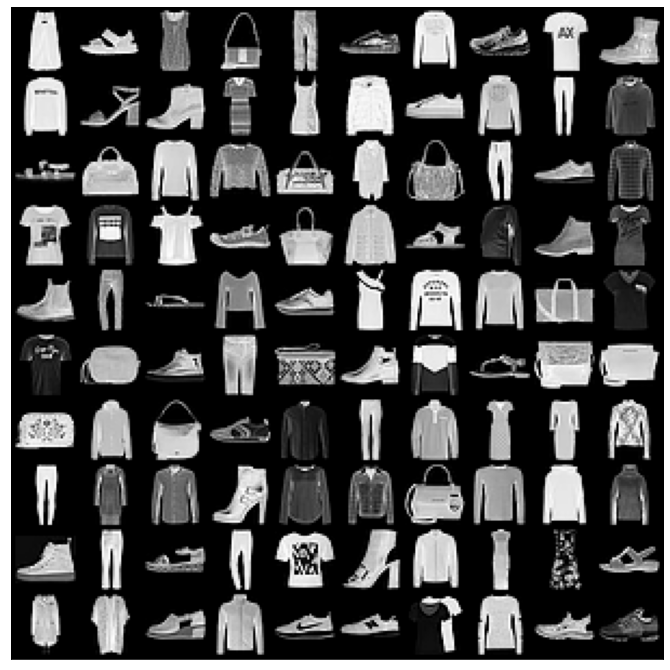

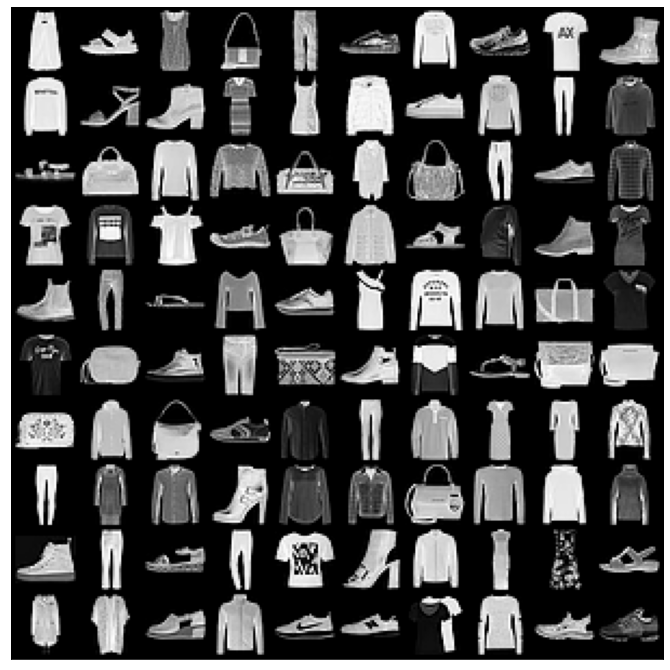

In [4]:
ds = FashionMNISTPair(DATA_FOLDER, download=True, transform=ToTensor())
for im, im2, _ in DataLoader(ds, batch_size=100, shuffle=True):
    show(make_grid(im, nrow=10))
    show(make_grid(im2, nrow=10))
    break

Counter(ds[x][2] for x in range(len(ds)))

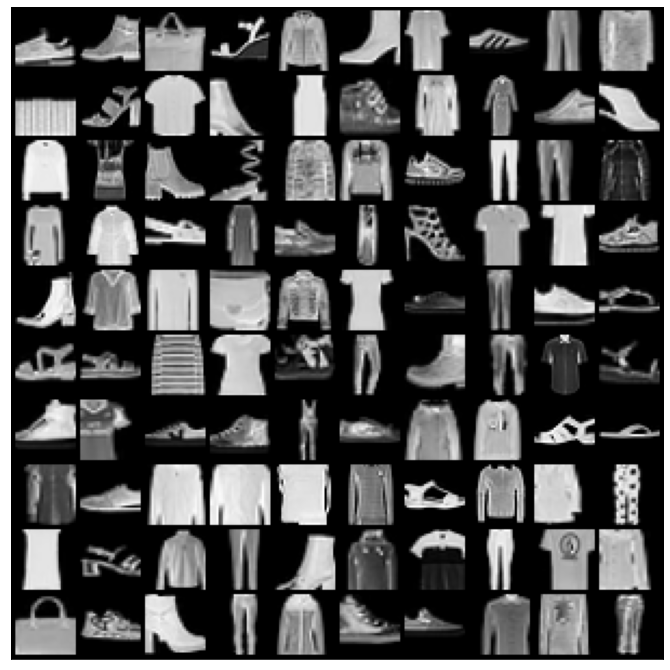

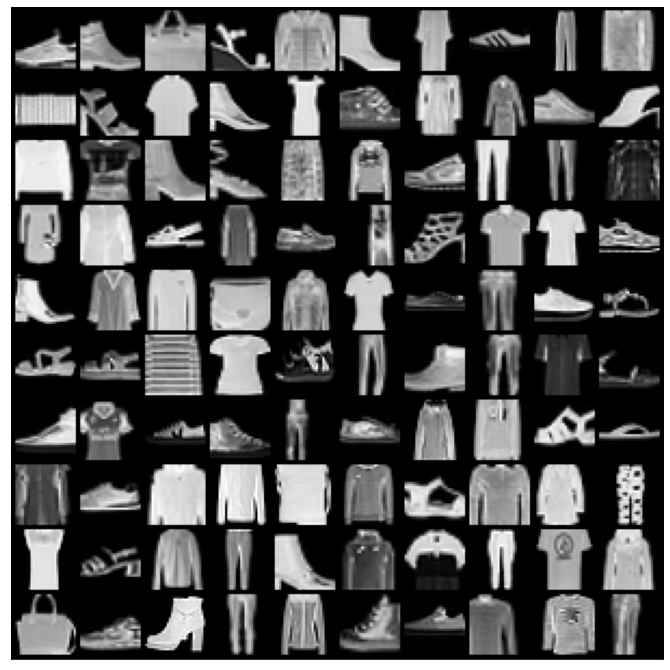

In [5]:
ds_mod = FashionMNISTDataModule(FashionMNISTPair, batch_size=100, data_dir=DATA_FOLDER)
for im, im2, _ in ds_mod.train_dataloader():
    show(make_grid(im, nrow=10))
    show(make_grid(im2, nrow=10))
    break

### Inference

In [6]:
if CLASSIFIER_PATH:
    model = Finetuner()
    model.load_state_dict(CLASSIFIER_PATH)
    for im, _, target in ds_mod.train_dataloader():
        show(make_grid(im, nrow=10))
        pred = torch.argmax(model(im), dim=1)[1]
        show(make_grid(target == pred, nrow=10))
        break

In [7]:
if os.path.isdir(DATA_FOLDER):
    shutil.rmtree(DATA_FOLDER)